In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### 1. Carnot cycle expression for the maximum potential intensity of a tropical cyclone

In [2]:
def evp_pot():
    cp = 1004.64 # J⋅K−1⋅kg−1
    ts_theta = 2 # K
    lv = 2.26 * 1e6 # J/kg
    qs_q = 2 * 1e-3 # kg/kg
    return cp * (ts_theta) + lv * (qs_q) 

def v_square(t0, ts):
    return evp_pot() * (0.7) * (ts - t0) / ts


In [3]:
t0 = np.arange(185, 220, 0.1)
ts =np.arange(285, 315, 0.1)
v2 = np.array([[v_square(t0=j, ts=i) for i in ts] for j in t0])

In [4]:
ds = xr.Dataset(data_vars=dict(
                                max_pot_int=(["T0", "Ts"], np.sqrt(v2)),                               
                               ), 
                coords=dict(T0=(["T0"], t0 - 273.15), 
                            Ts=(["Ts"], (ts - 273.15).T)
                           )
               )

### 1.a. Maximum wind predicted

<a list of 5 text.Text objects>

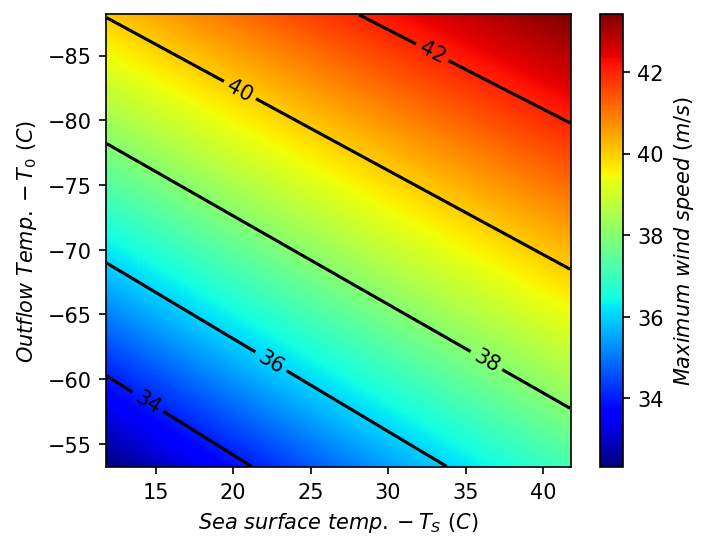

In [5]:
fig, ax = plt.subplots(figsize=(5,4), dpi=150)
sc = ds.max_pot_int.plot(ax=ax, add_colorbar=False, cmap="jet")
cs = ds.max_pot_int.plot.contour(ax=ax, colors=['k'])
ax.set_ylabel(r'$Outflow \ Temp. -T_0 \ (C) $')
ax.set_xlabel(r'$Sea \ surface \ temp.-T_S \ (C) $')
ax.invert_yaxis()
fig.colorbar(sc, ax=ax, label="$Maximum \ wind \ speed  \ (m/s)$")
ax.clabel(cs, fmt='%d')

### 1.b. Hurricane intensity under plausible climate change scenario ($T_s$ increase by $2K$)

In [6]:
def evp_pot_cc():
    cp = 1004.64 # J⋅K−1⋅kg−1
    ts_theta = 2 # K
    lv = 2.26 * 1e6 # J/kg
    qs_q = 2 * 1e-3 # kg/kg
    return cp * (ts_theta + 2) + lv * (qs_q) 

def v_square_cc(t0, ts):
    return evp_pot_cc() * (0.7) * (ts + 2 - t0) / (ts + 2)

In [7]:
v2_cc = np.array([[v_square_cc(t0=j, ts=i) for i in ts] for j in t0])
ds_cc = xr.Dataset(data_vars=dict(
                                max_pot_int=(["T0", "Ts"], np.sqrt(v2_cc)),                               
                               ), 
                coords=dict(T0=(["T0"], t0 - 273.15), 
                            Ts=(["Ts"], (ts - 273.15).T)
                           )
               )

<a list of 4 text.Text objects>

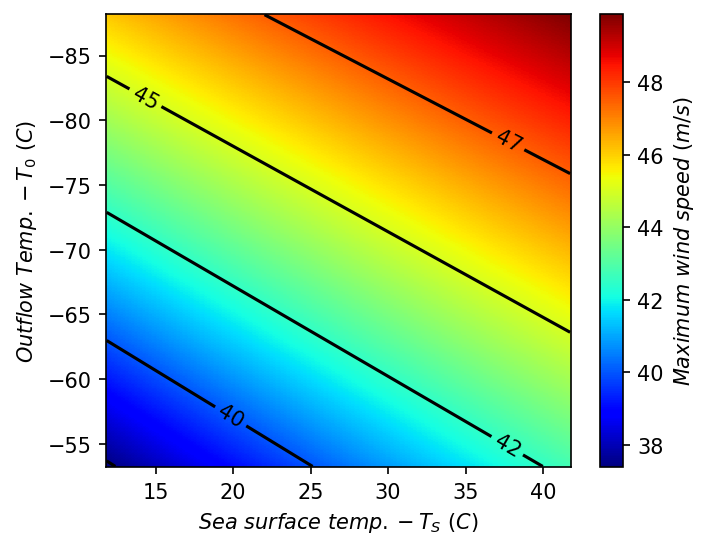

In [8]:
fig, ax = plt.subplots(figsize=(5,4), dpi=150)
sc = ds_cc.max_pot_int.plot(ax=ax, add_colorbar=False, cmap="jet")
cs = ds_cc.max_pot_int.plot.contour(ax=ax, colors=['k'])
ax.set_ylabel(r'$Outflow \ Temp. -T_0 \ (C) $')
ax.set_xlabel(r'$Sea \ surface \ temp.-T_S \ (C) $')
ax.invert_yaxis()
fig.colorbar(sc, ax=ax, label="$Maximum \ wind \ speed \ (m/s)$")
ax.clabel(cs, fmt='%d')

An increment in surface temperature by 2K under a climate change scenario will create a increment in maximum wind speed for Tropical Cyclones (TCs) as we can notice in 1b figure; for same SST this model predicts higher maximum wind speeds compared with figure 1a. Under a plausible climate change scenario this model predict stronger TCs based on the results of maximum wind speeds. Given that evaporation of latent heat is the most important source for TCs, the increment maximum wind speed could be associated to the increment increment in SST.